In [1]:
import pandas as pd

In [2]:
data1 = pd.read_csv('./datasets/상반기 주유소 판매가격.csv', encoding='cp949')
data2 = pd.read_csv('./datasets/하반기 주유소 판매가격.csv', encoding='cp949')
df1 = pd.concat([data1,data2])

data3 = pd.read_csv('./datasets/상반기 주유소 판매가격.csv', encoding='cp949')
data4 = pd.read_csv('./datasets/하반기 주유소 판매가격.csv', encoding='cp949')
df2 = pd.concat([data3,data4])

In [3]:
data1.shape, data2.shape

((90590, 11), (91124, 11))

In [4]:
df1

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...
91119,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100
91120,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100
91121,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100
91122,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181714 entries, 0 to 91123
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      181714 non-null  object
 1   지역      181714 non-null  object
 2   상호      181714 non-null  object
 3   주소      181714 non-null  object
 4   기간      181714 non-null  int64 
 5   상표      181714 non-null  object
 6   셀프여부    181714 non-null  object
 7   고급휘발유   181714 non-null  int64 
 8   휘발유     181714 non-null  int64 
 9   경유      181714 non-null  int64 
 10  실내등유    181714 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 16.6+ MB


In [6]:
df = df1.groupby([df1['지역'], df1['상호'] ,df1['상표']]).nunique()
df

번호  주소   기간  셀프여부  고급휘발유  휘발유  경유  실내등유
지역     상호                    상표                                            
서울 강남구 (주)동하힐탑셀프주유소          SK에너지   1   1  365     1     12   16  13     1
       (주)만정에너지              GS칼텍스   1   1  365     1     17   14  25    12
       (주)보성 세곡주유소           SK에너지   1   1  365     1      1   23  23     1
       (주)선진도곡주유소            S-OIL   1   1  365     1      4   15  13     1
       (주)소모에너지엔테크놀러지 쎈트럴주유소 GS칼텍스   1   1  365     1     23   27  25    18
...                                 ..  ..  ...   ...    ...  ...  ..   ...
서울 중랑구 우림주유소                 GS칼텍스   1   1  245     1      1   26  21     1
       재원에너지㈜ 범아주유소          S-OIL   1   1  365     1      1   14  13     1
       중랑교                   SK에너지   1   1  365     1     32   41  24     1
       지에스칼텍스㈜ 대원주유소         GS칼텍스   1   1  365     1     32   38  34     2
       지에스칼텍스㈜ 소망주유소         GS칼텍스   1   1  365     1      1   24  24     4

[528 rows x 8 columns]

In [7]:
data_df = df[df["기간"] >= 365]
data_df = data_df.reset_index()
data_df

,지역,상호,상표,번호,주소,기간,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울 강남구,(주)동하힐탑셀프주유소,SK에너지,1,1,365,1,12,16,13,1
1,서울 강남구,(주)만정에너지,GS칼텍스,1,1,365,1,17,14,25,12
2,서울 강남구,(주)보성 세곡주유소,SK에너지,1,1,365,1,1,23,23,1
3,서울 강남구,(주)선진도곡주유소,S-OIL,1,1,365,1,4,15,13,1
4,서울 강남구,(주)소모에너지엔테크놀러지 쎈트럴주유소,GS칼텍스,1,1,365,1,23,27,25,18
...,...,...,...,...,...,...,...,...,...,...,...
397,서울 중랑구,용마로주유소,SK에너지,1,1,365,1,1,12,11,3
398,서울 중랑구,재원에너지㈜ 범아주유소,S-OIL,1,1,365,1,1,14,13,1
399,서울 중랑구,중랑교,SK에너지,1,1,365,1,32,41,24,1
400,서울 중랑구,지에스칼텍스㈜ 대원주유소,GS칼텍스,1,1,365,1,32,38,34,2


In [8]:
df2['tmp'] = df2['지역'] + df2['상호'] + df2['상표']
data_df['tmp'] = data_df['지역'] + data_df['상호'] + data_df['상표']

In [9]:
data_df

,지역,상호,상표,번호,주소,기간,셀프여부,고급휘발유,휘발유,경유,실내등유,tmp
0,서울 강남구,(주)동하힐탑셀프주유소,SK에너지,1,1,365,1,12,16,13,1,서울 강남구(주)동하힐탑셀프주유소SK에너지
1,서울 강남구,(주)만정에너지,GS칼텍스,1,1,365,1,17,14,25,12,서울 강남구(주)만정에너지GS칼텍스
2,서울 강남구,(주)보성 세곡주유소,SK에너지,1,1,365,1,1,23,23,1,서울 강남구(주)보성 세곡주유소SK에너지
3,서울 강남구,(주)선진도곡주유소,S-OIL,1,1,365,1,4,15,13,1,서울 강남구(주)선진도곡주유소S-OIL
4,서울 강남구,(주)소모에너지엔테크놀러지 쎈트럴주유소,GS칼텍스,1,1,365,1,23,27,25,18,서울 강남구(주)소모에너지엔테크놀러지 쎈트럴주유소GS칼텍스
...,...,...,...,...,...,...,...,...,...,...,...,...
397,서울 중랑구,용마로주유소,SK에너지,1,1,365,1,1,12,11,3,서울 중랑구용마로주유소SK에너지
398,서울 중랑구,재원에너지㈜ 범아주유소,S-OIL,1,1,365,1,1,14,13,1,서울 중랑구재원에너지㈜ 범아주유소S-OIL
399,서울 중랑구,중랑교,SK에너지,1,1,365,1,32,41,24,1,서울 중랑구중랑교SK에너지
400,서울 중랑구,지에스칼텍스㈜ 대원주유소,GS칼텍스,1,1,365,1,32,38,34,2,서울 중랑구지에스칼텍스㈜ 대원주유소GS칼텍스


In [10]:
df2

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,tmp
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0,서울 강남구(주)동하힐탑셀프주유소SK에너지
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0,서울 강남구(주)동하힐탑셀프주유소SK에너지
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0,서울 강남구(주)동하힐탑셀프주유소SK에너지
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0,서울 강남구(주)동하힐탑셀프주유소SK에너지
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0,서울 강남구(주)동하힐탑셀프주유소SK에너지
...,...,...,...,...,...,...,...,...,...,...,...,...
91119,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스
91120,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스
91121,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스
91122,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스


In [11]:
df2 = df2.drop(axis=1, columns=['셀프여부', '고급휘발유', '경유', '실내등유'])

In [12]:
df2

,번호,지역,상호,주소,기간,상표,휘발유,tmp
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지
...,...,...,...,...,...,...,...,...
91119,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,1540,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스
91120,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,1540,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스
91121,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,1540,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스
91122,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,1540,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스


In [13]:
df2['result'] = df2['tmp'].isin(data_df['tmp'])

In [14]:
df2

,번호,지역,상호,주소,기간,상표,휘발유,tmp,result
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지,True
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지,True
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지,True
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지,True
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지,True
...,...,...,...,...,...,...,...,...,...
91119,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,1540,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스,True
91120,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,1540,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스,True
91121,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,1540,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스,True
91122,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,1540,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스,True


In [15]:
df2['result'].value_counts(dropna=False)

True     146730
False     34984
Name: result, dtype: int64

In [16]:
df2 = df2[df2['result'] == True].iloc[:, :-1]
df2

,번호,지역,상호,주소,기간,상표,휘발유,tmp
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지
...,...,...,...,...,...,...,...,...
91119,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,1540,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스
91120,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,1540,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스
91121,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,1540,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스
91122,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,1540,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스


In [17]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/marketindex/oilDailyQuote.naver?marketindexCd=OIL_GSL&page={}'
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Safari/537.36"}

total = []
for i in range(93, 146):
    r = requests.get(url.format(i), headers=headers)
    total.append(pd.read_html(r.text)[0])    

df_total = pd.concat(total)
df_total = df_total[1:-5]
df_total = df_total[["날짜","종가"]] 
df_total = df_total.sort_values(by=["날짜"], ignore_index=True)

In [18]:
df_total

,날짜,종가
0,2019.01.01,1375.08
1,2019.01.02,1371.58
2,2019.01.03,1367.67
3,2019.01.04,1363.93
4,2019.01.05,1361.02
...,...,...
360,2019.12.27,1556.18
361,2019.12.28,1556.80
362,2019.12.29,1557.19
363,2019.12.30,1557.74


In [19]:
df2['tmp'].value_counts()

서울 영등포구남부(영등포)SK에너지            365
서울 성동구SK네트웍스(주)효진주유소SK에너지      365
서울 서초구대성산업(주)직영강남주유소GS칼텍스      365
서울 구로구구로주유소GS칼텍스               365
서울 관악구관악시몬주유소S-OIL             365
                              ... 
서울 서초구지에스칼텍스(주)선천주유소GS칼텍스      365
서울 강남구학여울주유소GS칼텍스              365
서울 송파구방이주유소SK에너지               365
서울 강서구대성석유(주)방화대성주유소GS칼텍스      365
서울 강남구현대오일뱅크(주) 유진주유소현대오일뱅크    365
Name: tmp, Length: 402, dtype: int64

In [20]:
df_total['날짜'] = df_total['날짜'].str.replace(".", "")

<ipython-input-20-c21a25e151c8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_total['날짜'] = df_total['날짜'].str.replace(".", "")


In [21]:
df_total

,날짜,종가
0,20190101,1375.08
1,20190102,1371.58
2,20190103,1367.67
3,20190104,1363.93
4,20190105,1361.02
...,...,...
360,20191227,1556.18
361,20191228,1556.80
362,20191229,1557.19
363,20191230,1557.74


In [22]:
df2['기간'] = df2['기간'].astype(str)

In [23]:
df3 = pd.merge(df2, df_total, left_on="기간", right_on="날짜", how="left")

In [24]:
df3.drop(axis=1, columns=["날짜"], inplace=True)

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146730 entries, 0 to 146729
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   번호      146730 non-null  object 
 1   지역      146730 non-null  object 
 2   상호      146730 non-null  object 
 3   주소      146730 non-null  object 
 4   기간      146730 non-null  object 
 5   상표      146730 non-null  object 
 6   휘발유     146730 non-null  int64  
 7   tmp     146730 non-null  object 
 8   종가      146730 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 11.2+ MB


In [26]:
df3

,번호,지역,상호,주소,기간,상표,휘발유,tmp,종가
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지,1375.08
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지,1371.58
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지,1367.67
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지,1363.93
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,1465,서울 강남구(주)동하힐탑셀프주유소SK에너지,1361.02
...,...,...,...,...,...,...,...,...,...
146725,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,1540,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스,1556.18
146726,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,1540,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스,1556.80
146727,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,1540,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스,1557.19
146728,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,1540,서울 중랑구지에스칼텍스㈜ 소망주유소GS칼텍스,1557.74


In [27]:
df3.corr()

,휘발유,종가
휘발유,1.000000,0.376638
종가,0.376638,1.000000


In [28]:
print("<주유소별>")
arr = list(df3['tmp'].unique())

for i in arr:
    print(i, df3[df3['tmp'] == i].corr(), sep="\n")
    print("---------------------------------")

<주유소별>
서울 강남구(주)동하힐탑셀프주유소SK에너지
          휘발유        종가
휘발유  1.000000  0.978368
종가   0.978368  1.000000
---------------------------------
서울 강남구(주)만정에너지GS칼텍스
          휘발유        종가
휘발유  1.000000  0.908425
종가   0.908425  1.000000
---------------------------------
서울 강남구(주)보성 세곡주유소SK에너지
         휘발유       종가
휘발유  1.00000  0.95467
종가   0.95467  1.00000
---------------------------------
서울 강남구(주)선진도곡주유소S-OIL
          휘발유        종가
휘발유  1.000000  0.977275
종가   0.977275  1.000000
---------------------------------
서울 강남구(주)소모에너지엔테크놀러지 쎈트럴주유소GS칼텍스
          휘발유        종가
휘발유  1.000000  0.961747
종가   0.961747  1.000000
---------------------------------
서울 강남구(주)중앙에너비스 수서지점SK에너지
          휘발유        종가
휘발유  1.000000  0.966102
종가   0.966102  1.000000
---------------------------------
서울 강남구SK네트웍스(주) 매봉주유소SK에너지
          휘발유        종가
휘발유  1.000000  0.956811
종가   0.956811  1.000000
---------------------------------
서울 강남구SK논현주유소SK에너지
          휘발유        종가
휘발유  1.000000  0.967361
종가   0.967361  

서울 강서구목화주유소SK에너지
          휘발유        종가
휘발유  1.000000  0.985427
종가   0.985427  1.000000
---------------------------------
서울 강서구박물관주유소GS칼텍스
          휘발유        종가
휘발유  1.000000  0.990851
종가   0.990851  1.000000
---------------------------------
서울 강서구방화주유소SK에너지
          휘발유        종가
휘발유  1.000000  0.985385
종가   0.985385  1.000000
---------------------------------
서울 강서구세원제1주유소SK에너지
         휘발유       종가
휘발유  1.00000  0.97531
종가   0.97531  1.00000
---------------------------------
서울 강서구신화곡주유소S-OIL
          휘발유        종가
휘발유  1.000000  0.773944
종가   0.773944  1.000000
---------------------------------
서울 강서구염창동주유소SK에너지
          휘발유        종가
휘발유  1.000000  0.916376
종가   0.916376  1.000000
---------------------------------
서울 강서구우장산주유소SK에너지
          휘발유        종가
휘발유  1.000000  0.959727
종가   0.959727  1.000000
---------------------------------
서울 강서구유턴주유소알뜰주유소
         휘발유       종가
휘발유  1.00000  0.99189
종가   0.99189  1.00000
---------------------------------
서울 강서구참솔에너지S-OIL
     

서울 금천구순환도로SK에너지
          휘발유        종가
휘발유  1.000000  0.971921
종가   0.971921  1.000000
---------------------------------
서울 노원구sk네트웍스(주)직영 하계주유소SK에너지
          휘발유        종가
휘발유  1.000000  0.972021
종가   0.972021  1.000000
---------------------------------
서울 노원구노원주유소GS칼텍스
          휘발유        종가
휘발유  1.000000  0.979899
종가   0.979899  1.000000
---------------------------------
서울 노원구배꽃나라주유소GS칼텍스
          휘발유        종가
휘발유  1.000000  0.985041
종가   0.985041  1.000000
---------------------------------
서울 노원구불암주유소S-OIL
          휘발유        종가
휘발유  1.000000  0.991067
종가   0.991067  1.000000
---------------------------------
서울 노원구삼육주유소SK에너지
          휘발유        종가
휘발유  1.000000  0.993662
종가   0.993662  1.000000
---------------------------------
서울 노원구상계동주유소현대오일뱅크
         휘발유       종가
휘발유  1.00000  0.98946
종가   0.98946  1.00000
---------------------------------
서울 노원구성북역주유소GS칼텍스
          휘발유        종가
휘발유  1.000000  0.971902
종가   0.971902  1.000000
---------------------------------
서울 노원구

서울 서대문구(주)마봉 신우주유소S-OIL
          휘발유        종가
휘발유  1.000000  0.990869
종가   0.990869  1.000000
---------------------------------
서울 서대문구(주)창원이엔지 홍제지점현대오일뱅크
         휘발유       종가
휘발유  1.00000  0.98802
종가   0.98802  1.00000
---------------------------------
서울 서대문구KH에너지㈜직영 독립문주유소SK에너지
          휘발유        종가
휘발유  1.000000  0.991728
종가   0.991728  1.000000
---------------------------------
서울 서대문구남정주유소GS칼텍스
          휘발유        종가
휘발유  1.000000  0.991069
종가   0.991069  1.000000
---------------------------------
서울 서대문구문화촌주유소S-OIL
          휘발유        종가
휘발유  1.000000  0.956938
종가   0.956938  1.000000
---------------------------------
서울 서대문구삼미상사(주)서부주유소SK에너지
          휘발유        종가
휘발유  1.000000  0.967604
종가   0.967604  1.000000
---------------------------------
서울 서대문구삼보셀프주유소SK에너지
          휘발유        종가
휘발유  1.000000  0.995337
종가   0.995337  1.000000
---------------------------------
서울 서대문구중앙에너비스 동교지점SK에너지
          휘발유        종가
휘발유  1.000000  0.984885
종가   0.984885  1.000000
-------

종가   0.982418  1.000000
---------------------------------
서울 성북구지에스칼텍스㈜ 세창주유소GS칼텍스
          휘발유        종가
휘발유  1.000000  0.959877
종가   0.959877  1.000000
---------------------------------
서울 성북구지에스칼텍스㈜ 화랑주유소GS칼텍스
          휘발유        종가
휘발유  1.000000  0.938571
종가   0.938571  1.000000
---------------------------------
서울 성북구현대오일뱅크㈜직영 고대셀프주유소현대오일뱅크
          휘발유        종가
휘발유  1.000000  0.990461
종가   0.990461  1.000000
---------------------------------
서울 송파구(주)뉴명성산업 남성주유소현대오일뱅크
          휘발유        종가
휘발유  1.000000  0.957542
종가   0.957542  1.000000
---------------------------------
서울 송파구(주)삼표에너지 훼미리주유소GS칼텍스
          휘발유        종가
휘발유  1.000000  0.975717
종가   0.975717  1.000000
---------------------------------
서울 송파구(주)신화에너지 서울지점SK에너지
          휘발유        종가
휘발유  1.000000  0.990991
종가   0.990991  1.000000
---------------------------------
서울 송파구(주)유진주유소SK에너지
          휘발유        종가
휘발유  1.000000  0.979027
종가   0.979027  1.000000
---------------------------------
서울 송파구(주)잠실에너지S-OIL
 

서울 영등포구행촌주유소SK에너지
          휘발유        종가
휘발유  1.000000  0.968129
종가   0.968129  1.000000
---------------------------------
서울 용산구(주)남경주유소SK에너지
          휘발유        종가
휘발유  1.000000  0.965598
종가   0.965598  1.000000
---------------------------------
서울 용산구(주)신태성주유소SK에너지
         휘발유       종가
휘발유  1.00000  0.92828
종가   0.92828  1.00000
---------------------------------
서울 용산구(주)영원 풍기주유소GS칼텍스
          휘발유        종가
휘발유  1.000000  0.974394
종가   0.974394  1.000000
---------------------------------
서울 용산구(주)한독모터스용산뉴타운주유소GS칼텍스
          휘발유        종가
휘발유  1.000000  0.959174
종가   0.959174  1.000000
---------------------------------
서울 용산구갈월동주유소SK에너지
          휘발유        종가
휘발유  1.000000  0.962389
종가   0.962389  1.000000
---------------------------------
서울 용산구동자동주유소SK에너지
          휘발유        종가
휘발유  1.000000  0.977239
종가   0.977239  1.000000
---------------------------------
서울 용산구수림석유 제3한강주유소GS칼텍스
         휘발유       종가
휘발유  1.00000  0.87231
종가   0.87231  1.00000
----------------------------

In [29]:
print("<상표별>")
arr = list(df3['상표'].unique())

for i in arr:
    print(i, df3[df3['상표'] == i].corr(), sep="\n")
    print("---------------------------------")

<상표별>
SK에너지
          휘발유        종가
휘발유  1.000000  0.332273
종가   0.332273  1.000000
---------------------------------
GS칼텍스
          휘발유        종가
휘발유  1.000000  0.378449
종가   0.378449  1.000000
---------------------------------
S-OIL
          휘발유        종가
휘발유  1.000000  0.461686
종가   0.461686  1.000000
---------------------------------
현대오일뱅크
          휘발유        종가
휘발유  1.000000  0.580817
종가   0.580817  1.000000
---------------------------------
알뜰주유소
          휘발유        종가
휘발유  1.000000  0.965954
종가   0.965954  1.000000
---------------------------------
알뜰(ex)
          휘발유        종가
휘발유  1.000000  0.982453
종가   0.982453  1.000000
---------------------------------
자가상표
          휘발유        종가
휘발유  1.000000  0.984292
종가   0.984292  1.000000
---------------------------------


In [30]:
print("<지역별>")
arr = list(df3['지역'].unique())

for i in arr:
    print(i, df3[df3['지역'] == i].corr(), sep="\n")
    print("---------------------------------")

<지역별>
서울 강남구
          휘발유        종가
휘발유  1.000000  0.329612
종가   0.329612  1.000000
---------------------------------
서울 강동구
          휘발유        종가
휘발유  1.000000  0.506356
종가   0.506356  1.000000
---------------------------------
서울 강북구
          휘발유        종가
휘발유  1.000000  0.934286
종가   0.934286  1.000000
---------------------------------
서울 강서구
          휘발유        종가
휘발유  1.000000  0.632724
종가   0.632724  1.000000
---------------------------------
서울 관악구
          휘발유        종가
휘발유  1.000000  0.893205
종가   0.893205  1.000000
---------------------------------
서울 광진구
          휘발유        종가
휘발유  1.000000  0.860885
종가   0.860885  1.000000
---------------------------------
서울 구로구
          휘발유        종가
휘발유  1.000000  0.425874
종가   0.425874  1.000000
---------------------------------
서울 금천구
          휘발유        종가
휘발유  1.000000  0.817391
종가   0.817391  1.000000
---------------------------------
서울 노원구
          휘발유        종가
휘발유  1.000000  0.746297
종가   0.746297  1.000000
-----------

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

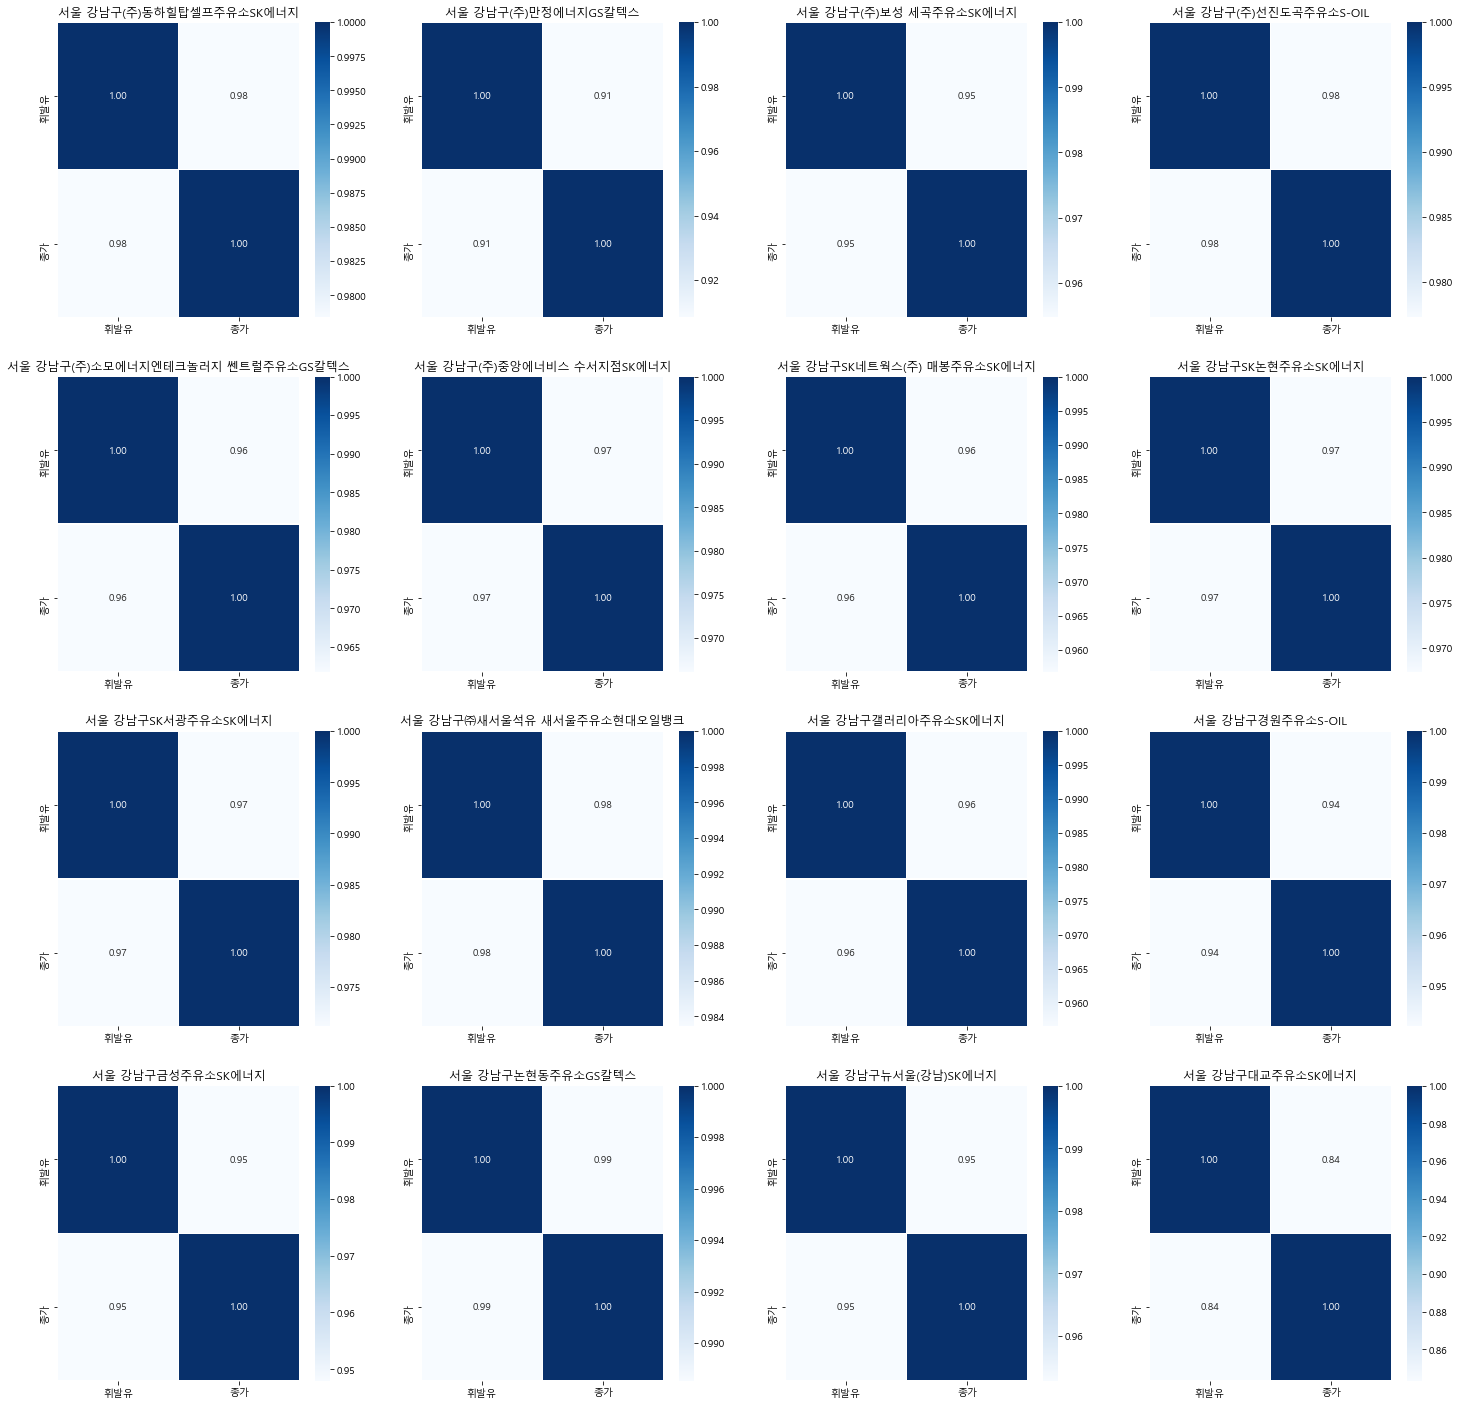

In [32]:
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

fig, axes = plt.subplots(4, 4, figsize=(25, 25))
axes = axes.ravel()

lst = list(df3['tmp'].unique())

for i in range(16):
    d = df3[df3['tmp'] == lst[i]].corr()
    axes[i].set_title('{}'.format(lst[i]))
    sns.heatmap(data = d, annot=True, fmt='.2f', linewidths=.5, cmap='Blues', ax=axes[i])

- 브랜드별로는 대기업일 수록 상관계수가 낮게 분포하여 국제휘발유 가격 변동과의 연관성이 낮은것으로 보여지며, 지역적으로는 강남보다 강북이 평균적으로 상관계수가 낮으나, 강북에서도 일반적으로 부촌이 형성되어있는 지역구의 판매가격은 상관계수가 낮게 나타났다.